In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import datetime as dt
from math import cos,sin
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import pickle
from sklearn.metrics import mean_absolute_error
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
import graphviz
import pydotplus
import tensorflow as tf
from keras.utils.vis_utils import plot_model

In [3]:
df = pd.read_csv('cities_minustemps.csv',compression="gzip")
df = df.astype({'City':str, \
                'Latitude':'float32', \
                'Longitude':'float32', \
                'x':'float32','y':'float32', \
                'z':'float32', \
                'Month':'int32', \
                'Year':'int32', \
                'TempMinus1':'float32', 'TempMinus2':'float32','AverageTemperature':'float32'})

label_binarizer = LabelBinarizer()
  
# fitting the column 
# TEMPERATURE to LabelBinarizer
label_binarizer_output = label_binarizer.fit_transform( df['Month'])

df = df.merge(pd.DataFrame(label_binarizer_output,columns=['January','February','March','April','May','June','July','August','September','October','November','December']).astype(bool),left_index=True,right_index=True)

In [4]:
pca_data_columns = ['Year',
 'x','y','z',
'TempMinus1',
'January','February','March','April','May','June','July','August','September','October','November','December']

pca_df = df[pca_data_columns+['AverageTemperature']].dropna()

target_columns = ['AverageTemperature']


In [5]:
# Use features from RFE
data_columns = pca_data_columns #list(rfe.feature_names_in_[rfe.support_])

target_columns = ['AverageTemperature']

model_df = df[data_columns+['AverageTemperature']].dropna()

# Grab data and target columns
y = model_df[target_columns]
X = model_df[data_columns]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [6]:
sc = StandardScaler()
X_trains = sc.fit_transform(X_train)
X_tests = sc.transform(X_test)

#tuner.search(X_trains, y_train, epochs=5, validation_data=(X_tests, y_test))
#model = tuner.get_best_models()[0]

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(17, activation = 'tanh', input_dim = 17))

# Adding the second hidden layer
model.add(Dense(units = 16, activation = 'tanh'))

# Adding the third hidden layer
model.add(Dense(units = 16, activation = 'tanh'))

# Adding the output layer
model.add(Dense(units = 1))

optimizer = Adam() 

model.compile(optimizer = optimizer,loss = 'mean_squared_error')

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 17)                306       
                                                                 
 dense_1 (Dense)             (None, 16)                288       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 883
Trainable params: 883
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(X_trains, y_train, batch_size = 50, epochs = 3)

Epoch 1/3
108787/108787 [==============================] - 92s 843us/step - loss: 4.1906
Epoch 2/3
108787/108787 [==============================] - 96s 886us/step - loss: 2.9720
Epoch 3/3
108787/108787 [==============================] - 95s 869us/step - loss: 2.9589


In [8]:
model

In [10]:
model.save('./city_monthly_nn_model.h5')

In [ ]:
y_pred = model.predict(X_tests)

In [11]:
print("Model Scores: ")
print("r2 score: ",r2_score(y_pred,y_test))
print("mse: ",mean_squared_error(y_pred,y_test))

Model Scores: 
r2 score:  0.9775457017717708
mse:  2.3596883


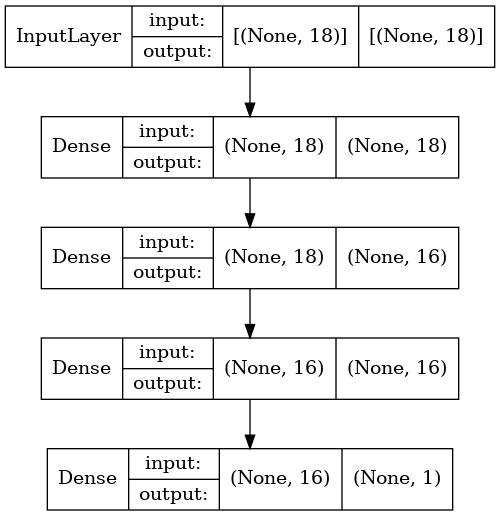

In [15]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=False,)